## 相关值图像抽取

In [1]:
import os, sys
import torch
sys.path.append('../data/')
sys.path.append("../")
from load_cifar import load_cifar
from load_olivetti import load_olivetti
from resnet import resnet
from preact_resnet import PreActResNet18
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader, TensorDataset
import numpy as np

In [2]:
def normalize(x):
    x_shape = x.shape
    x = x.flatten()
    x_min = np.min(x)
    x_max = np.max(x)
    x = (x - x_min) / (x_max - x_min)
    return x.reshape(x_shape)

In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [6]:
def cor_pictures(path):
    net.load_state_dict(torch.load(path))
    params = [p for p in net.parameters() if p.requires_grad]
    params = torch.cat([p.flatten() for p in params if p.ndimension()>1])
    print(params.shape)
    four_pic = params[:8*32*32].reshape(8,32,32)
    for i in range(8):
        plt.subplot(2,4,i+1)
        img = normalize(four_pic[i].cpu().detach().numpy())
        img = (img * 255).astype(np.uint8)
        plt.imshow(img, cmap='gray')
        plt.axis('off')

torch.Size([461872])


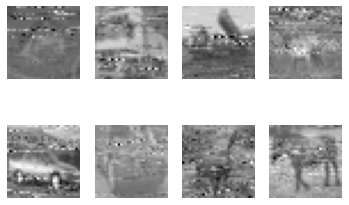

In [7]:
# ResNet34
net = resnet(num_classes=10).to(device)
path = 'ckpts/cifar_cor_res5_2.0_model.ckpt'
cor_pictures(path)

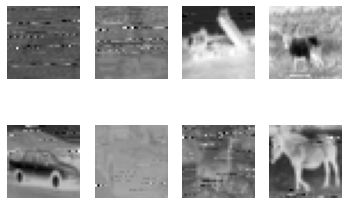

In [64]:
# ResNet34
net = PreActResNet18(num_classes=10).to(device)
path = 'ckpts/cifar_cor_preact_resnet_8.0_model.ckpt'
cor_pictures(path)

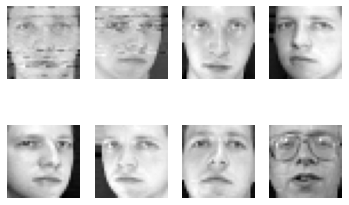

In [7]:
# ResNet34
net = PreActResNet18(num_classes=40).to(device)
path = 'ckpts/olivetti_cor_preact_16.0_model.ckpt'
cor_pictures(path)